# Springboard Capstone Project -'Credit Card Default' Case Study

## Brief

We are developing the machine learning models to predict the default of credit card clients using [the data](http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) from UCI machine learning repository. 

This data was collected from Taiwan between April 2005 and September 2005. It includes 30000 instances with 24 attributes. The credit line, gender, education, marital status, past payments history, bill statement, and the amounts of previous payments are the predictor variables. Default, whether the client will default or not, is the target variable. As a data scientist, our duty is to explore different machine learning algorithms and compare their predictive accuracy of the probability of default. 

-------------------------------
**1. Exploratory data analysis** 
- Load relevant libraries 
- Load the data
- Description of the attributes
- Explore the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
file='default of credit card clients.xls'
df=pd.read_excel(file, header=1)
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [3]:
df.shape

(30000, 25)

In [4]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

All variables are numerical now. Let's check the missing data

In [5]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Without missing data in this data set, basically we can develop model directly now if we want. But before model development, we still need to explore the data

• ID of each client
• LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
• SEX: Gender (1=male, 2=female)
• EDUCATION: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
• MARRIAGE: Marital status 
• AGE: Age in years
• PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
• PAY_2: Repayment status in August, 2005 (scale same as above)
• PAY_3: Repayment status in July, 2005 (scale same as above)
• PAY_4: Repayment status in June, 2005 (scale same as above)
• PAY_5: Repayment status in May, 2005 (scale same as above)
• PAY_6: Repayment status in April, 2005 (scale same as above)
• BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
• BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
• BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
• BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
• BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
• BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
• PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
• PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
• PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
• PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
• PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
• PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
• default.payment.next.month: Default payment (1=yes, 0=no)

In [6]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

First,let's explore four dummy variables in this data set. The target variable is 'default payment next month'. The other three are 'SEX', 'EDUCATION', and 'MARRIAGE'. 

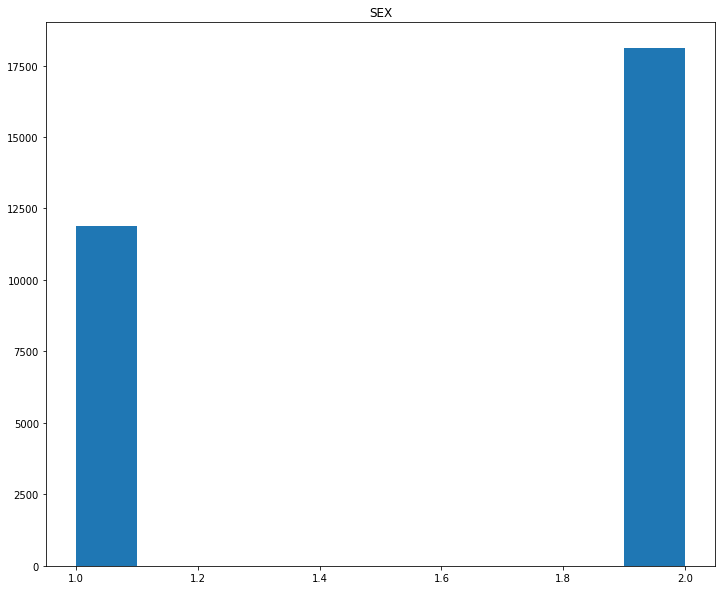

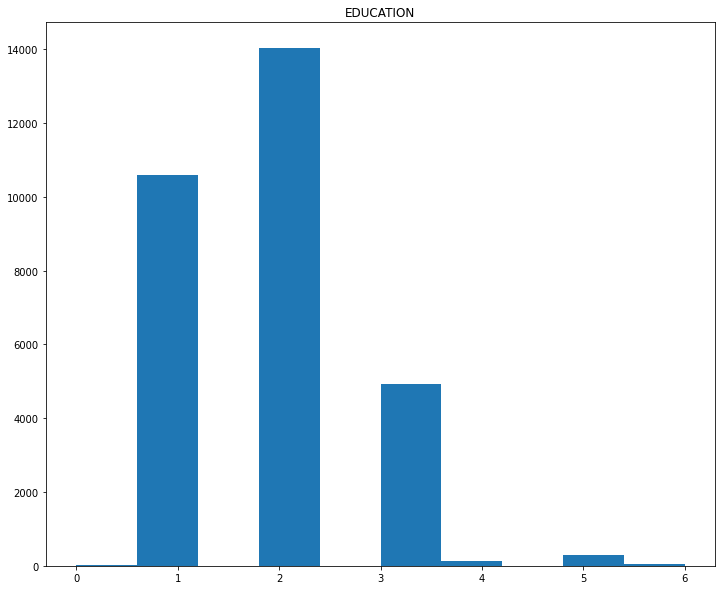

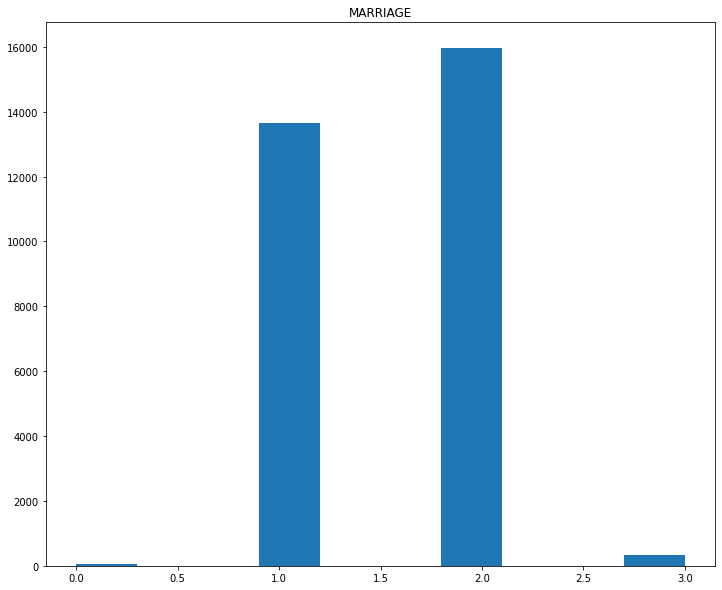

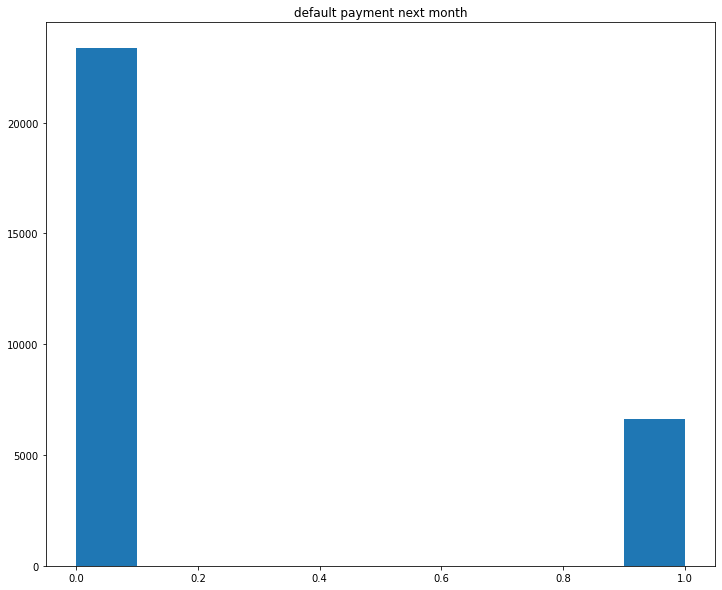

In [7]:
dummy_var=['SEX','EDUCATION','MARRIAGE','default payment next month']
for v in dummy_var:
    plt.figure(figsize=(12,10))
    plt.hist(df[v])
    plt.title(v)

* SEX: 1 = male; 2 = female. There are more female card holders than male
* EDUCATION: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown People graduated from universities or graduate school are the dominant card holders, followed by people with high school degree and others subsequently
* MARRIAGE: 1 = married; 2 = single; 3 = others Married and single persons are the primary card holders. 
* default payment next month: Yes = 1, No = 0. Most of the cases are the ones without default payment next month.

In [25]:
#study the distribution of 'default payment next month' across those dummy variables
#Let's check default payment next month between different sex first
sex_default=df['default payment next month'].groupby(df['SEX']).value_counts(normalize=True).unstack(fill_value=0).round(3)
sex_default

default payment next month,0,1
SEX,,
1,0.758,0.242
2,0.792,0.208


In [28]:
#Q1: Is there any difference of the credit card default between male and female? We can use Chi-square test or the nonparametric Wilcoxon-Mann-Whitney test (Kruskal Wallis test for >=3 levels comparison).
from scipy.stats import chi2_contingency, chi2
stat, p, dof, expected = chi2_contingency(sex_default)
prob=0.95
critical=chi2.ppf(prob,dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


Thus, we didn't find the significant difference of the credit card default between male and female

In [29]:
marriage_default=df['default payment next month'].groupby(df['MARRIAGE']).value_counts(normalize=True).unstack(fill_value=0).round(3)
marriage_default

default payment next month,0,1
MARRIAGE,,
0,0.907,0.093
1,0.765,0.235
2,0.791,0.209
3,0.740,0.260


In [31]:
#Q2: Does married person have significantly lower default rate compare with people with the other marriage status? 
stat, p, dof, expected = chi2_contingency(marriage_default)
prob=0.95
critical=chi2.ppf(prob,dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


Marriage status is not a significant factor just like sex for the credit card default rate.

In [32]:
education_default=df['default payment next month'].groupby(df['EDUCATION']).value_counts(normalize=True).unstack(fill_value=0).round(3)
education_default

default payment next month,0,1
EDUCATION,,
0,1.000,0.000
1,0.808,0.192
2,0.763,0.237
3,0.748,0.252
4,0.943,0.057
5,0.936,0.064
6,0.843,0.157


In [33]:
#Q3: How about education? Are people received the high education training tend to keep good credit and pay their balance on time?
stat, p, dof, expected = chi2_contingency(education_default)
prob=0.95
critical=chi2.ppf(prob,dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


Chi-square test persistently gave us the negative results. Just like sex and marriage status, education is not a significant factor for the credit card default.

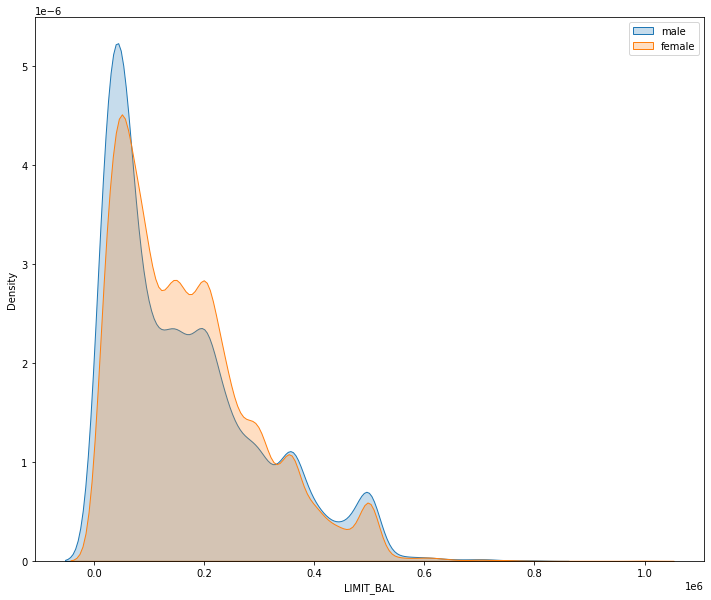

In [40]:
#Q4: How about credit limit? Is sex, education or marriage a signficant player for the credit limit? It is 'LIMIT_BAL' in this data set.
data1=df[df['SEX']==1]['LIMIT_BAL']
data2=df[df['SEX']==2]['LIMIT_BAL']
plt.figure(figsize=(12,10))
sns.kdeplot(data1, shade=True, label='male')
sns.kdeplot(data2, shade=True, label='female')
plt.legend()

We cannot detect big difference of LIMIT_BAL between male and female clients.

In [42]:
#Let's check marriage status. Because most clients are either single or married. We only compare this two groups
df['default payment next month'].groupby(df['MARRIAGE']).value_counts().unstack(fill_value=0)

default payment next month,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


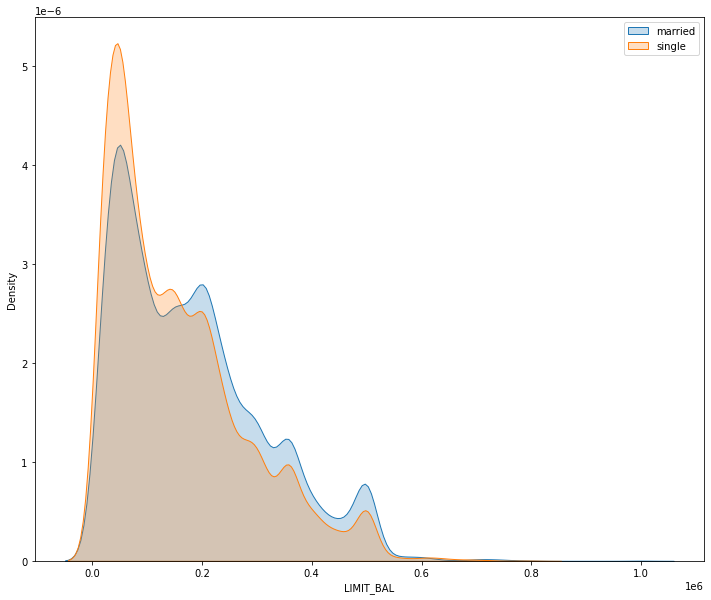

In [41]:
data1=df[df['MARRIAGE']==1]['LIMIT_BAL']
data2=df[df['MARRIAGE']==2]['LIMIT_BAL']
plt.figure(figsize=(12,10))
sns.kdeplot(data1, shade=True, label='married')
sns.kdeplot(data2, shade=True, label='single')
plt.legend()

The difference of LIMIT_BAL between single and married clients is not that obvious.

In [43]:
#compare LIMIT-BAL across different education levels
df['default payment next month'].groupby(df['EDUCATION']).value_counts().unstack(fill_value=0)
#There are three dominant education levels in these clients, 1, graduate school, 2, university, and 3, high school.

default payment next month,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


Text(0.5, 850000, 'look at this outlier')

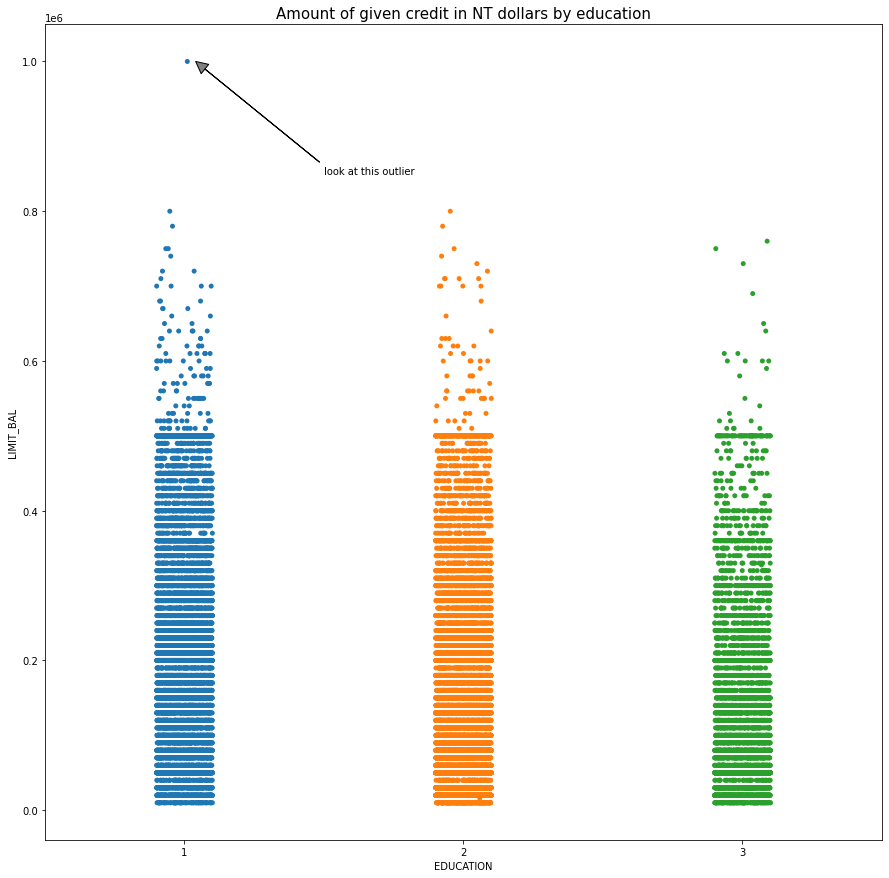

In [71]:
#Check the distribution of LIMIT_BAL across education
data3=df[df.EDUCATION.isin([1, 2, 3])]
plt.figure(figsize=(15,15))
sns.stripplot(y='LIMIT_BAL', x='EDUCATION', data=data3, size =5)
plt.title('Amount of given credit in NT dollars by education', fontsize=15)
plt.annotate('look at this outlier', xy=(0.04,1000000), xytext=(0.5, 850000), arrowprops={'facecolor':'grey','width':0.2}, backgroundcolor='white')

We cannot find very obvious difference in credit limit between clients with different education level 
Next, we will explore the correlation among three time series data sets individually, 'pay_n', 'bill_AMTn', and 'pay_AMTn'

In [86]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [89]:
#Q5: Is there any correlations between the time series variables??
# study the correlation between pay_0, pay_2, pay_3, pay_4, pay_5, pay_6
pay=df.filter(regex="PAY_[0-6]", axis=1)
pay.shape

(30000, 6)

In [98]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

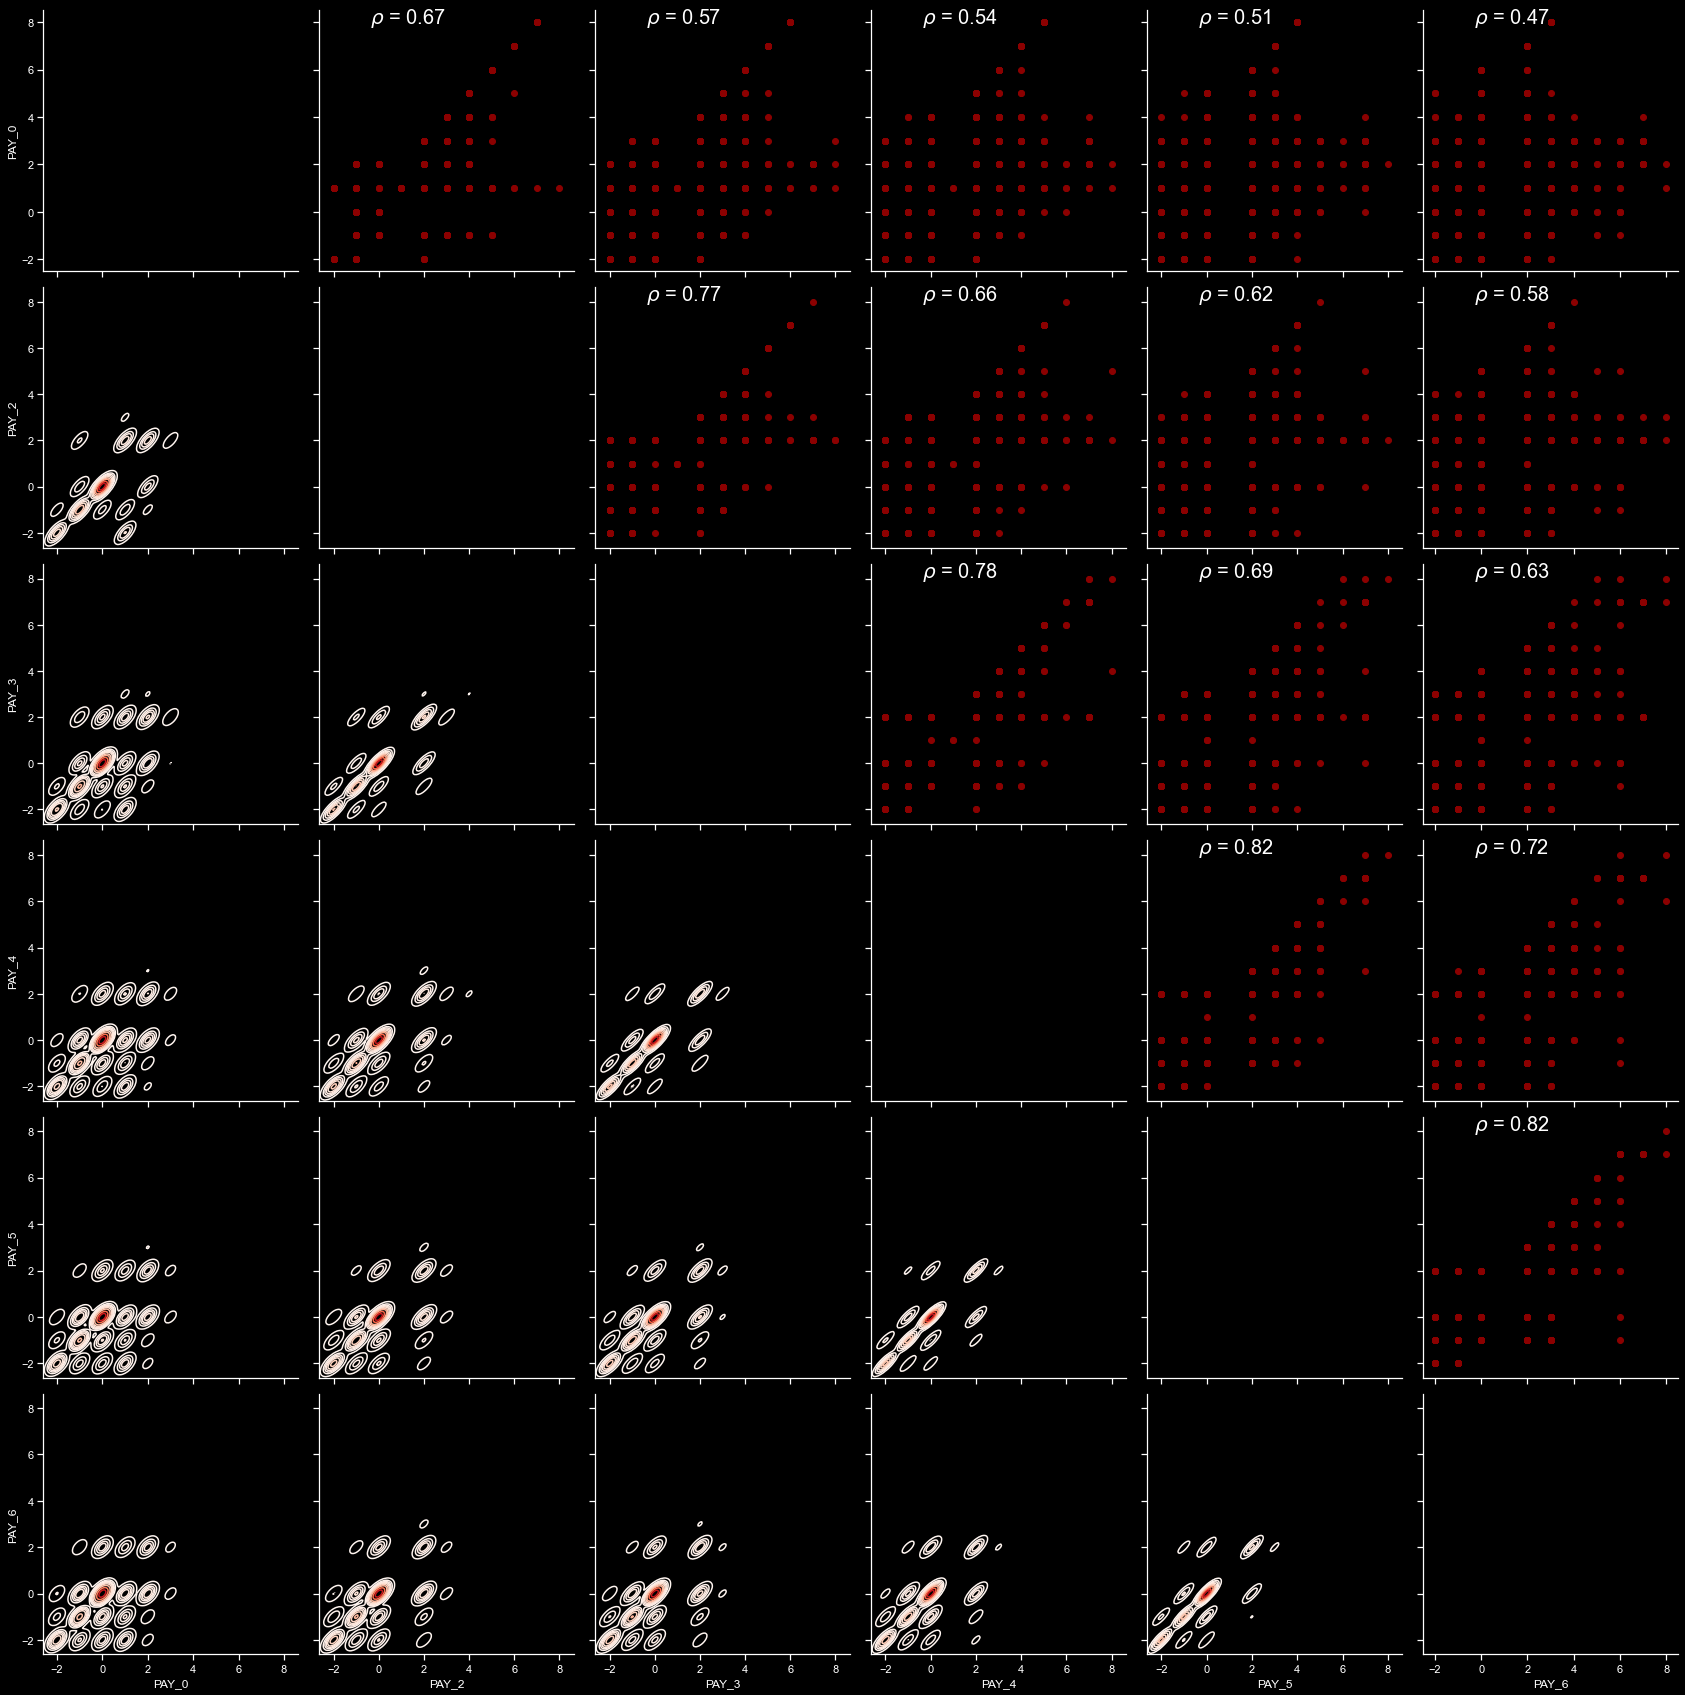

In [99]:
# Create a pair grid instance
plt.style.use("dark_background")
grid = sns.PairGrid(data= pay,
                    vars = pay.columns, height = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins=10, color = 'darkred')

There is correlation between certain variables in pay data set, such as pay_4 vs pay_5, pay_6 vs pay_5. We need do feature engineering before model development.

In [90]:
## study the correlation between BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6
bill=df.filter(regex="BILL_AMT[1-6]", axis=1)
bill.shape

(30000, 6)

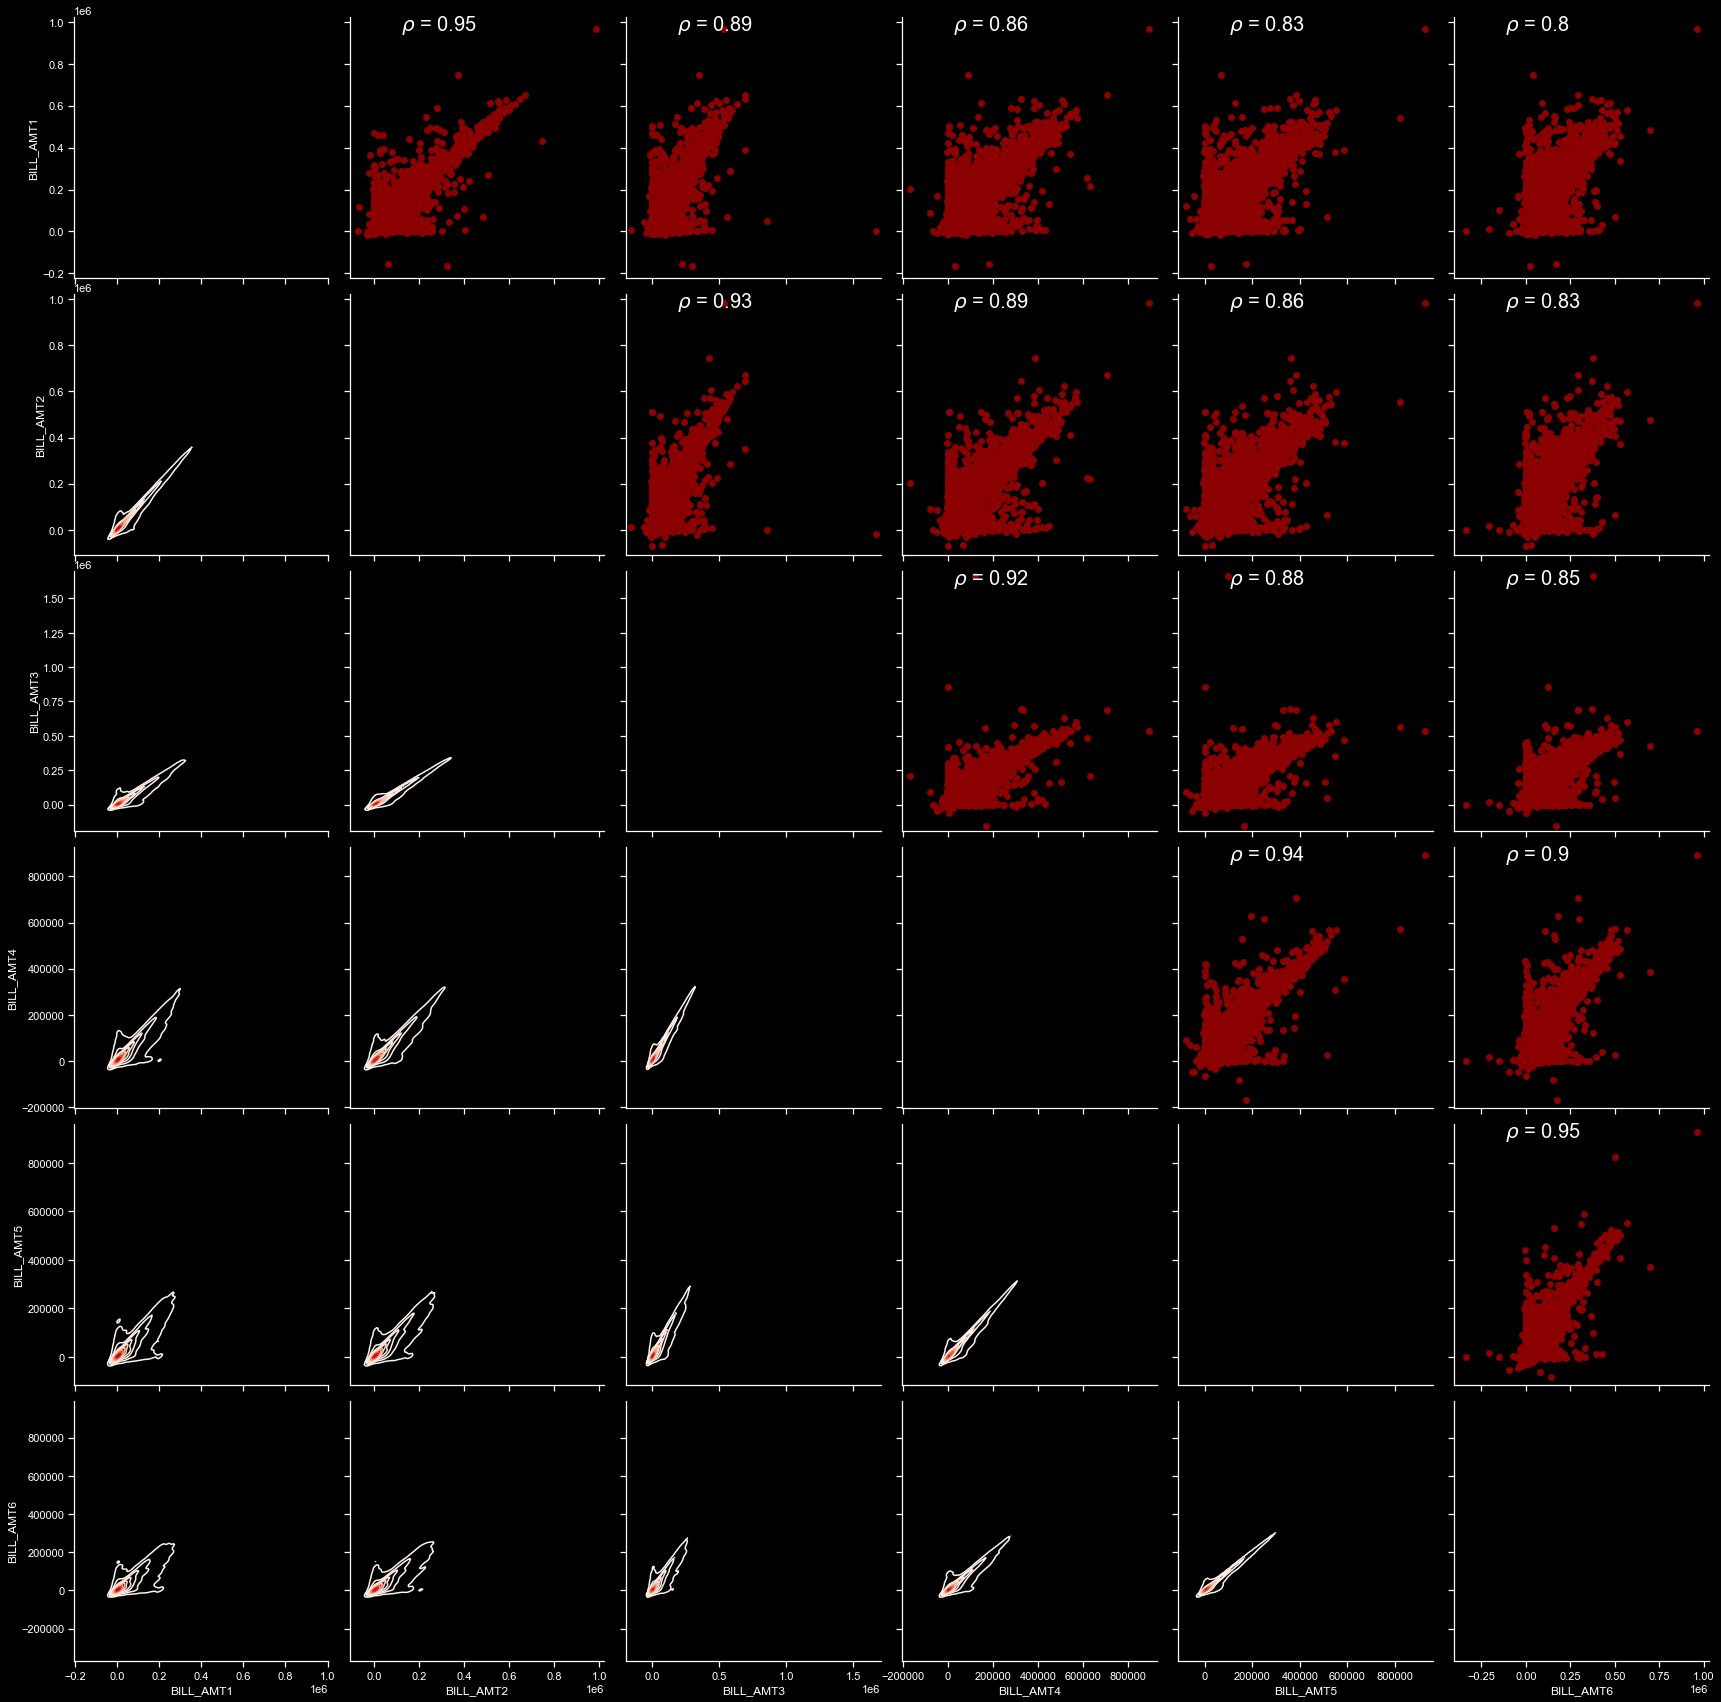

In [100]:
# Create a pair grid instance
plt.style.use("dark_background")
grid = sns.PairGrid(data= bill,
                    vars = bill.columns, height = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, edgecolor =  'k', color = 'darkred')

The variables in the bill data set have higher correlation coefficient than the ones in the pay data set. 

In [91]:
pay_AMT=df.filter(regex="PAY_AMT[1-6]", axis=1)
pay_AMT.shape

(30000, 6)

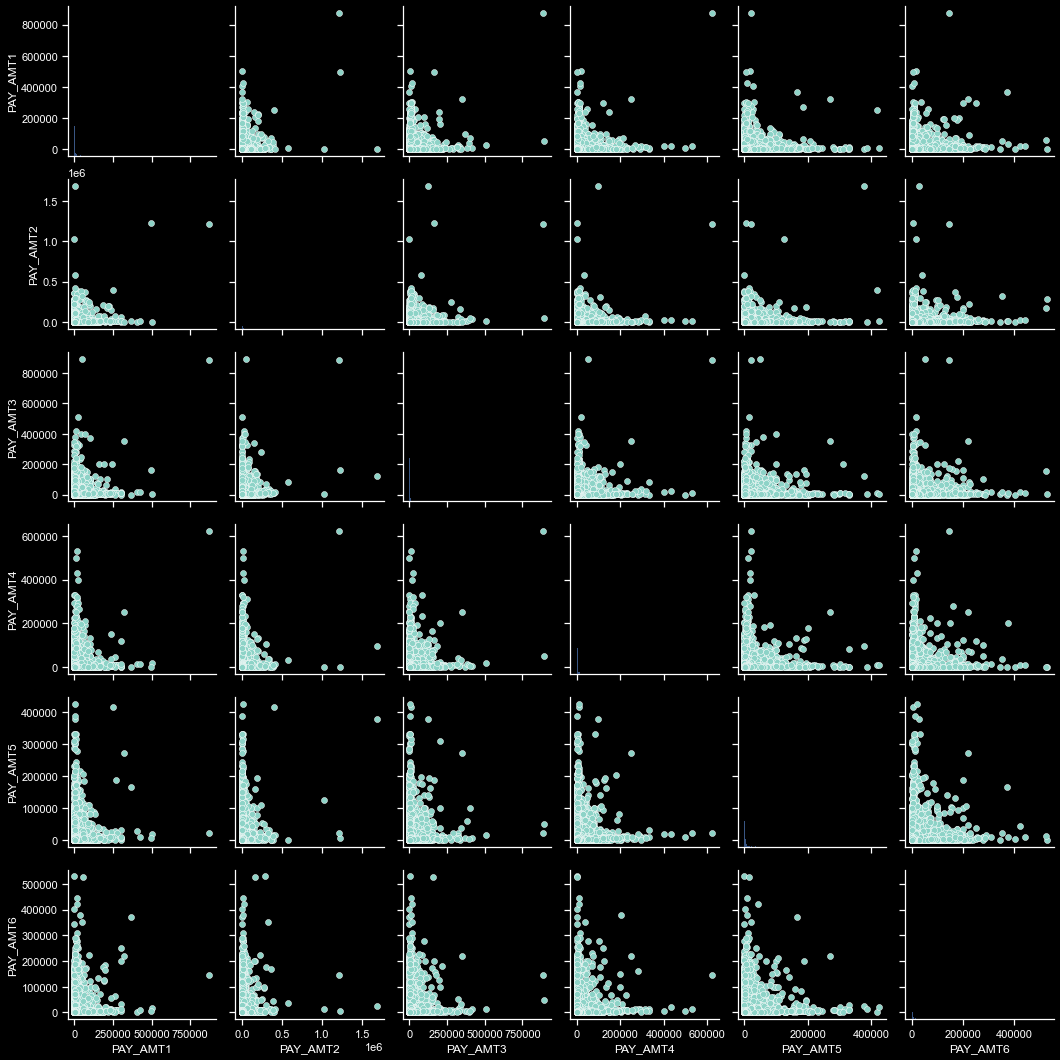

In [102]:
# Create a pair grid instance
plt.style.use("dark_background")
sns.pairplot(pay_AMT)

Text(0.5, 1.0, 'Correlation Heatmap')

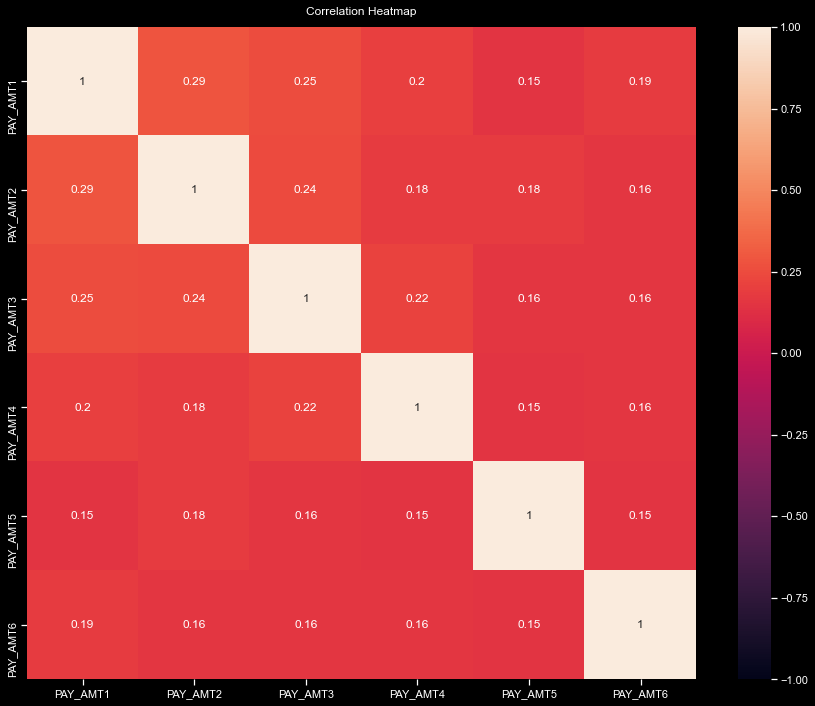

In [104]:
plt.figure(figsize=(15,12))
heatmap=sns.heatmap(pay_AMT.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

We found correlated variables in pay and bill data set, but not in pay_AMT data set. Is it possible to convert these time series variables into single variables in the feature engineering part? We will explore it in the next section.

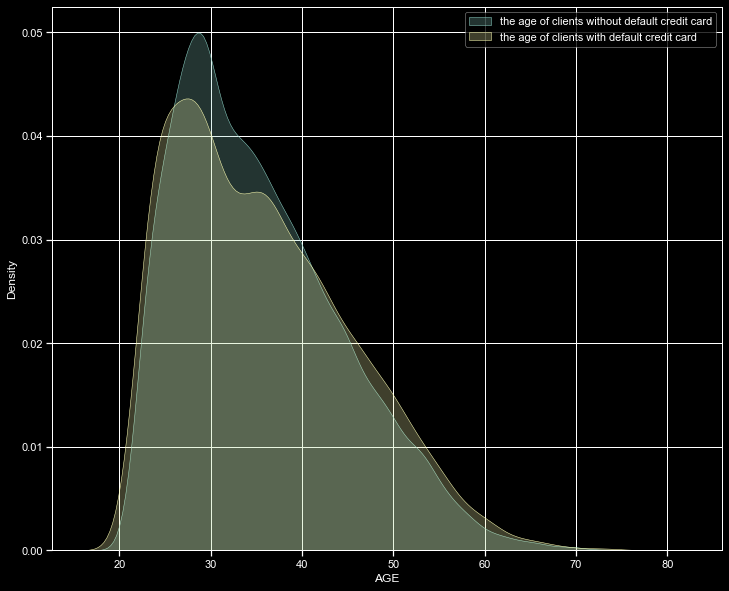

In [109]:
#Q6: How about the distribution of age and its correlation with credit card default and credit limit? Do young people tend to get higher credit limit? Do old people have less credit card default rate?
plt.style.use("dark_background")
data1=df[df['default payment next month']==0]['AGE']
data2=df[df['default payment next month']==1]['AGE']
plt.figure(figsize=(12,10))
sns.kdeplot(data1, shade=True, label='the age of clients without default credit card')
sns.kdeplot(data2, shade=True, label='the age of clients with default credit card')
plt.legend()

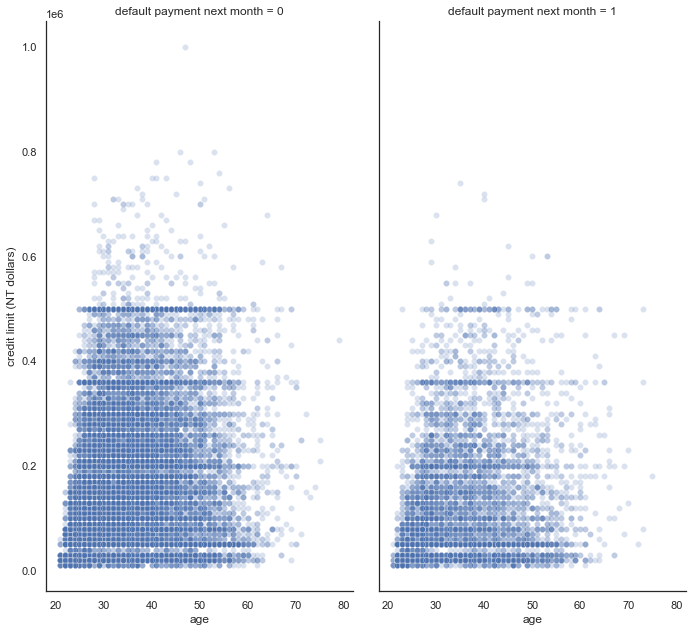

In [126]:
age_credit_default=df[['AGE','LIMIT_BAL', 'default payment next month']]
sns.set_theme(style="white")
g = sns.FacetGrid(data = age_credit_default, col = 'default payment next month', col_wrap = 3)
# Map sns.scatterplot to create separate scatter plots
g.map(sns.scatterplot, 'AGE', 'LIMIT_BAL', alpha = 0.2)
g.set_axis_labels("age", "credit limit (NT dollars)")
g.fig.set_size_inches(15,12)

We didn't find a trend in the scatter plot of age and credit limit.